###                                                Predicting the “Heart disease severity”

#### Importing required libraries

In [411]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### Reading train and test data

In [412]:
train = pd.read_csv("Train.csv",na_values=["","NA","-9"])
test = pd.read_csv("Test.csv",na_values=["","NA","-9"])

#### Observe the data using head() function

In [413]:
train.head()

,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,...,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location,Severity
0,3172,37,1,1.0,0.0,0.0,3,118.0,240.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Va,None
1,4242,41,0,NaN,NaN,NaN,2,126.0,306.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,name,Cleveland,None
2,2247,54,1,0.0,0.0,0.0,1,120.0,171.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian,Moderate
3,2072,44,1,1.0,0.0,0.0,2,130.0,215.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian,None
4,2188,58,1,1.0,0.0,0.0,2,130.0,251.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Hungarian,MildClass2


#### Checking dimensions of the data

In [414]:
train.shape

(674, 55)

In [415]:
test.shape

(223, 54)

#### Checking the data types of attributes

In [416]:
train.dtypes

id                       int64
age                      int64
gender                   int64
chestpainloc           float64
painexertion           float64
reliefbyrest           float64
chestpaintype            int64
restingBP              float64
serumcholesterol       float64
IsSmoker               float64
NumCigs                float64
SmokingPeriod          float64
FastingBS              float64
FamHistory             float64
restingECGRes          float64
ECGspecsDigitalis      float64
ECGspecsBetaBlocker    float64
ECGspecsNitrates       float64
ECGspecsCalci          float64
ECGspecsdiuretic       float64
ExTestDuration         float64
TimeSTNoted            float64
Metabolism             float64
MaxHR                  float64
RestHRGen              float64
PeakExBP1              float64
PeakExBP2              float64
restingBPGen           float64
ExInducedAngina        float64
xhypo                  float64
Stdepression           float64
Slope                  float64
Heightat

#### Different classes in Outcome variable

In [417]:
train['Severity'].unique()

array(['None', 'Moderate', 'MildClass2', 'MildClass1', 'Severe'],
      dtype=object)

#### Count for different categories in 'Severity' attribute

In [418]:
train['Severity'].value_counts()

None          228
Moderate      147
MildClass1    136
MildClass2    118
Severe         45
Name: Severity, dtype: int64

#### Identifying numeric attributes

In [419]:
num_attr = ['id','age','restingBP','serumcholesterol','NumCigs','SmokingPeriod','ExTestDuration','TimeSTNoted','Metabolism','MaxHR','RestHRGen',
            'PeakExBP1','PeakExBP2','restingBPGen','Stdepression','HeightatRest','heightatPeakEx','restRaidonuclid']
print(num_attr)

['id', 'age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod', 'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression', 'HeightatRest', 'heightatPeakEx', 'restRaidonuclid']


#### Identifying categorical attributes

In [420]:
cat_attr = [i for i in train.columns if i not in num_attr]
print(cat_attr)

['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'NumMajVessels', 'restwallmotion', 'exerRadinalid', 'ExerWallmotion', 'thalassemia', 'thalsev', 'thalpul', 'earlobe', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'nameOfPatient', 'Location', 'Severity']


#### Converting to appropriate datatype

In [421]:
for i in cat_attr:
    train[i] = train[i].astype("category")

In [422]:
train.dtypes

id                        int64
age                       int64
gender                 category
chestpainloc           category
painexertion           category
reliefbyrest           category
chestpaintype          category
restingBP               float64
serumcholesterol        float64
IsSmoker               category
NumCigs                 float64
SmokingPeriod           float64
FastingBS              category
FamHistory             category
restingECGRes          category
ECGspecsDigitalis      category
ECGspecsBetaBlocker    category
ECGspecsNitrates       category
ECGspecsCalci          category
ECGspecsdiuretic       category
ExTestDuration          float64
TimeSTNoted             float64
Metabolism              float64
MaxHR                   float64
RestHRGen               float64
PeakExBP1               float64
PeakExBP2               float64
restingBPGen            float64
ExInducedAngina        category
xhypo                  category
Stdepression            float64
Slope   

#### Assigning Id to index and dropping Id column

In [423]:
train.index = train['id']
test.index = test['id']

In [424]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

#### Dropping 'name','ExerWallmotion','earlobe' columns as they have unique values

In [425]:
train.drop(['nameOfPatient','ExerWallmotion','earlobe'],axis=1,inplace=True)
test.drop(['nameOfPatient','ExerWallmotion','earlobe'],axis=1,inplace=True)

In [426]:
train.shape

(674, 51)

In [427]:
test.shape

(223, 50)

#### Descriptive statistics

In [428]:
train.describe(include='all')

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,NumCigs,...,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,Severity
count,674.000000,674.0,628.0,631.0,636.0,674.0,629.000000,654.000000,573.0,655.000000,...,639.0,637.0,638.0,587.0,637.0,586.0,637.0,634.0,674,674
unique,NaN,2.0,2.0,2.0,2.0,4.0,NaN,NaN,2.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4,5
top,NaN,1.0,1.0,1.0,1.0,4.0,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hungarian,None
freq,NaN,529.0,597.0,452.0,498.0,363.0,NaN,NaN,488.0,NaN,...,472.0,514.0,492.0,559.0,549.0,570.0,471.0,553.0,222,228
mean,53.731454,NaN,NaN,NaN,NaN,NaN,131.567568,202.246177,NaN,18.567939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.472914,NaN,NaN,NaN,NaN,NaN,18.886030,110.366335,NaN,13.292909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,28.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,120.000000,179.250000,NaN,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,130.000000,224.500000,NaN,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,60.000000,NaN,NaN,NaN,NaN,NaN,140.000000,269.000000,NaN,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

#### Severity distribution

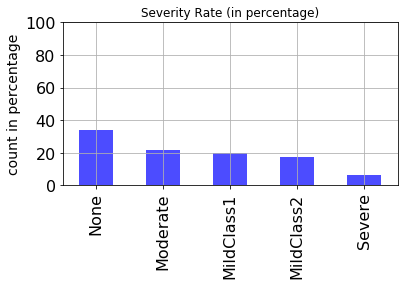

In [241]:
((train.Severity.value_counts()/sum(train.Severity.value_counts()))*100).plot(kind='bar',
                                  figsize=(6,3),
                                  color=["blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Severity Rate (in percentage)')
plt.ylabel('count in percentage',fontsize = 14)
plt.grid(True)
plt.show()

Observation: Majority class is 'None' and minority class is 'Severe'.

#### Location distribution

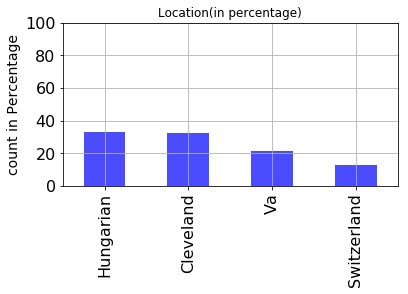

In [401]:
((train.Location.value_counts()/sum(train.Location.value_counts()))*100).plot(kind='bar',
                                  figsize=(6,3),
                                  color=["blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Location(in percentage)')
plt.ylabel('count in Percentage',fontsize = 14)
plt.grid(True)
plt.show()

Observation: More people from Hungarian have done heart disease check ups than other locations

#### Location wise Severity

In [402]:
temp = train.groupby(['Location','Severity']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Location','Severity','Count']
temp

,Location,Severity,Count
0,Cleveland,MildClass1,39
1,Cleveland,MildClass2,30
2,Cleveland,Moderate,41
3,Cleveland,None,98
4,Cleveland,Severe,11
5,Hungarian,MildClass1,25
6,Hungarian,MildClass2,37
7,Hungarian,Moderate,47
8,Hungarian,None,98
9,Hungarian,Severe,15


In [403]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff    ### To draw tables
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
%matplotlib inline

init_notebook_mode(connected=True)


In [404]:
trace1 = go.Bar(x = temp.Location[temp.Severity=='MildClass1'],
               y = temp.Count[temp.Severity=='MildClass1']/temp.Count.sum(),
               name = 'MildClass1')
trace2 = go.Bar(x = temp.Location[temp.Severity=='MildClass2'],
               y = temp.Count[temp.Severity=='MildClass2']/temp.Count.sum(),
               name = 'MildClass2')
trace3 = go.Bar(x = temp.Location[temp.Severity=='Moderate'],
               y = temp.Count[temp.Severity=='Moderate']/temp.Count.sum(),
               name = 'Moderate')
trace4 = go.Bar(x = temp.Location[temp.Severity=='None'],
               y = temp.Count[temp.Severity=='None']/temp.Count.sum(),
               name = 'None')
trace5 = go.Bar(x = temp.Location[temp.Severity=='Severe'],
               y = temp.Count[temp.Severity=='Severe']/temp.Count.sum(),
               name = 'Severe')
data = [trace1,trace2,trace3,trace4,trace5]
layout = go.Layout(width = 800,
                  height = 600,title = 'Location and Severity')
fig = go.Figure(data=data)
iplot(fig)


Observation: Severity is none for most of the People from Cleveland and Hungarian.
             Severity rate is high for Hungarian people compared to other locations.

#### Gender wise severity

In [429]:
temp = train.groupby(['gender','Severity']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['gender','Severity','Count']
temp

,gender,Severity,Count
0,0,MildClass1,12
1,0,MildClass2,16
2,0,Moderate,22
3,0,None,89
4,0,Severe,6
5,1,MildClass1,124
6,1,MildClass2,102
7,1,Moderate,125
8,1,None,139
9,1,Severe,39


In [433]:
trace1 = go.Bar(x = temp.gender[temp.Severity=='MildClass1'],
               y = temp.Count[temp.Severity=='MildClass1']/temp.Count.sum(),
               name = 'MildClass1')
trace2 = go.Bar(x = temp.gender[temp.Severity=='MildClass2'],
               y = temp.Count[temp.Severity=='MildClass2']/temp.Count.sum(),
               name = 'MildClass2')
trace3 = go.Bar(x = temp.gender[temp.Severity=='Moderate'],
               y = temp.Count[temp.Severity=='Moderate']/temp.Count.sum(),
               name = 'Moderate')
trace4 = go.Bar(x = temp.gender[temp.Severity=='None'],
               y = temp.Count[temp.Severity=='None']/temp.Count.sum(),
               name = 'None')
trace5 = go.Bar(x = temp.gender[temp.Severity=='Severe'],
               y = temp.Count[temp.Severity=='Severe']/temp.Count.sum(),
               name = 'Severe')
data = [trace1,trace2,trace3,trace4,trace5]
layout = go.Layout(width = 800,
                  height = 600,title = 'Gender and Severity')
fig = go.Figure(data=data)
iplot(fig)

Observation: Men are more prone to Heart disease than women.

### Age vs Severity

In [409]:
trace1 = go.Box(y = train.age[train.Severity=='MildClass1'],name = 'MildClass1',
                boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = train.age[train.Severity=='MildClass2'],name= 'MildClass2',
               boxpoints = 'all',jitter = 1
               )
trace3 = go.Box(y = train.age[train.Severity=='Moderate'],name= 'Moderate',
               boxpoints = 'all',jitter = 1
               )
trace4 = go.Box(y = train.age[train.Severity=='None'],name= 'None',
               boxpoints = 'all',jitter = 1
               )
trace5 = go.Box(y = train.age[train.Severity=='Severe'],name= 'Severe',
               boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2,trace3,trace4,trace5]
layout = go.Layout(width = 1000,
                   height = 500,title = 'Age Vs Severity')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

Observation: People in the age group 48-62 are more prone to heart diseases

#### Number of cigarettes and period of smoking

In [430]:
train[['NumCigs','SmokingPeriod']].corr()

,NumCigs,SmokingPeriod
NumCigs,1.000000,0.563341
SmokingPeriod,0.563341,1.000000


In [432]:
trace = go.Scatter(x=train.NumCigs ,
                  y= train.SmokingPeriod,
                  name = 'No of cigarettes and smoking period',
                  mode= 'markers')
data = [trace]
layout = go.Layout(title = ' No of cigarettes and smoking period distribution',
                  xaxis = dict(title = 'No of cigarettes'),
                  yaxis = dict(title = 'smoking period'))
fig = go.Figure(data=data,layout=layout)
iplot(fig)

Observation: There is no correlation between no of cigarettes per day and smoking period

#### Creating new column 'total_Cigs' combining 'NumCigs' and 'SmokingPeriod' columns

In [354]:
train['total_Cigs'] = train['NumCigs']*train['SmokingPeriod']*365
test['total_Cigs'] = test['NumCigs']*test['SmokingPeriod']*365

In [355]:
train.drop(['NumCigs','SmokingPeriod'],axis=1,inplace=True)
test.drop(['NumCigs','SmokingPeriod'],axis=1,inplace=True)

In [356]:
train.head()
test.head()

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,FastingBS,...,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,total_Cigs
id,,,,,,,,,,,,,,,,,,,,,
4043,71,0,1.0,1.0,1.0,2,160.0,302.0,1.0,0.0,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,Cleveland,730000.0
4159,60,1,1.0,1.0,1.0,4,140.0,293.0,NaN,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,Cleveland,525600.0
5065,53,1,1.0,1.0,0.0,2,120.0,0.0,1.0,0.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,Switzerland,131765.0
2003,37,1,1.0,0.0,0.0,2,130.0,283.0,1.0,0.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,Hungarian,131765.0
3027,51,1,1.0,1.0,1.0,4,NaN,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,Va,438000.0


#### Train and validation Split¶

In [357]:
y=train["Severity"]
x=train.drop('Severity', axis=1)

In [358]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.20,random_state=0)  

#### Checking for null values

In [359]:
train.isnull().sum()

age                      0
gender                   0
chestpainloc            46
painexertion            43
reliefbyrest            38
chestpaintype            0
restingBP               45
serumcholesterol        20
IsSmoker               101
FastingBS               62
FamHistory              60
restingECGRes            1
ECGspecsDigitalis       52
ECGspecsBetaBlocker     51
ECGspecsNitrates        50
ECGspecsCalci           49
ECGspecsdiuretic        62
ExTestDuration          44
TimeSTNoted             17
Metabolism              80
MaxHR                   43
RestHRGen               43
PeakExBP1               47
PeakExBP2               47
restingBPGen            45
ExInducedAngina         43
xhypo                   45
Stdepression            46
Slope                   40
HeightatRest            18
heightatPeakEx           6
NumMajVessels           20
restRaidonuclid         33
restwallmotion         122
exerRadinalid           33
thalassemia             76
thalsev                 30
t

In [360]:
test.isnull().sum()

age                     0
gender                  0
chestpainloc           10
painexertion           13
reliefbyrest           19
chestpaintype           0
restingBP              14
serumcholesterol       10
IsSmoker               33
FastingBS              28
FamHistory             24
restingECGRes           1
ECGspecsDigitalis      16
ECGspecsBetaBlocker    15
ECGspecsNitrates       15
ECGspecsCalci          14
ECGspecsdiuretic       20
ExTestDuration         12
TimeSTNoted             6
Metabolism             25
MaxHR                  12
RestHRGen              13
PeakExBP1              16
PeakExBP2              16
restingBPGen           14
ExInducedAngina        12
xhypo                  13
Stdepression           16
Slope                  22
HeightatRest            3
heightatPeakEx          1
NumMajVessels          10
restRaidonuclid        11
restwallmotion         52
exerRadinalid          12
thalassemia            19
thalsev                 8
thalpul                11
LeftMaintrun

### Imputing Missing Values

In [361]:
num_cols=list(x_train.select_dtypes(include = ['float64','int64']).columns)
print(num_cols)
cat_cols=list(x_train.select_dtypes(include = ['category']).columns)
print(cat_cols)

['age', 'restingBP', 'serumcholesterol', 'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression', 'HeightatRest', 'heightatPeakEx', 'restRaidonuclid', 'total_Cigs']
['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'NumMajVessels', 'restwallmotion', 'exerRadinalid', 'thalassemia', 'thalsev', 'thalpul', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'Location']


In [362]:
for i in num_cols:
    x_train[i] = x_train[i].fillna(x_train[i].median())
    x_valid[i] = x_valid[i].fillna(x_train[i].median())
    test[i] = test[i].fillna(x_train[i].median())
            

In [363]:
for i in cat_cols:
    x_train[i] = x_train[i].fillna(x_train[i].mode()[0])
    x_valid[i] = x_valid[i].fillna(x_train[i].mode()[0])
    test[i] = test[i].fillna(x_train[i].mode()[0])
     

In [364]:
#x_train.isnull().sum()
#x_valid.isnull().sum()
test.isnull().sum()

age                    0
gender                 0
chestpainloc           0
painexertion           0
reliefbyrest           0
chestpaintype          0
restingBP              0
serumcholesterol       0
IsSmoker               0
FastingBS              0
FamHistory             0
restingECGRes          0
ECGspecsDigitalis      0
ECGspecsBetaBlocker    0
ECGspecsNitrates       0
ECGspecsCalci          0
ECGspecsdiuretic       0
ExTestDuration         0
TimeSTNoted            0
Metabolism             0
MaxHR                  0
RestHRGen              0
PeakExBP1              0
PeakExBP2              0
restingBPGen           0
ExInducedAngina        0
xhypo                  0
Stdepression           0
Slope                  0
HeightatRest           0
heightatPeakEx         0
NumMajVessels          0
restRaidonuclid        0
restwallmotion         0
exerRadinalid          0
thalassemia            0
thalsev                0
thalpul                0
LeftMaintrunk          0
ladproximation         0


In [365]:
x_train.tail()

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,FastingBS,...,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,total_Cigs
id,,,,,,,,,,,,,,,,,,,,,
5120,56,1,1.0,1.0,1.0,4,125.0,0.0,1.0,1.0,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,Switzerland,131765.0
5004,50,1,1.0,1.0,1.0,4,145.0,0.0,1.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Switzerland,131765.0
4102,34,1,1.0,1.0,1.0,1,118.0,182.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cleveland,43800.0
4112,56,1,1.0,1.0,1.0,4,125.0,249.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cleveland,27375.0
3142,56,1,1.0,0.0,1.0,3,130.0,208.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Va,438000.0


#### Dummifying Categorical attributes

In [366]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le1 = preprocessing.LabelEncoder()
le1.fit(x_train['Location'])
x_train['Location'] = le1.fit_transform(x_train['Location'])
x_valid['Location'] = le1.fit_transform(x_valid['Location'])
test['Location'] = le1.fit_transform(test['Location'])

In [367]:
x_train.head()
test.head()

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,FastingBS,...,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,total_Cigs
id,,,,,,,,,,,,,,,,,,,,,
4043,71,0,1.0,1.0,1.0,2,160.0,302.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,730000.0
4159,60,1,1.0,1.0,1.0,4,140.0,293.0,1.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0,525600.0
5065,53,1,1.0,1.0,0.0,2,120.0,0.0,1.0,0.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2,131765.0
2003,37,1,1.0,0.0,0.0,2,130.0,283.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,131765.0
3027,51,1,1.0,1.0,1.0,4,130.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3,438000.0


#### Data type conversion for model building

In [368]:
categorical_cols=list(x_train.select_dtypes(include = ['category']).columns)
print(categorical_cols)

['gender', 'chestpainloc', 'painexertion', 'reliefbyrest', 'chestpaintype', 'IsSmoker', 'FastingBS', 'FamHistory', 'restingECGRes', 'ECGspecsDigitalis', 'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci', 'ECGspecsdiuretic', 'ExInducedAngina', 'xhypo', 'Slope', 'NumMajVessels', 'restwallmotion', 'exerRadinalid', 'thalassemia', 'thalsev', 'thalpul', 'LeftMaintrunk', 'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1', 'obtuseMarginal2', 'rcaproximation', 'rcadistance']


In [369]:
for i in categorical_cols:
    x_train[i] = x_train[i].astype("int64")

In [370]:
for i in categorical_cols:
    x_valid[i] = x_valid[i].astype("int64")

In [371]:
for i in categorical_cols:
    test[i] = test[i].astype("int64")

In [372]:
y_train = y_train.astype("object")
y_valid = y_valid.astype("object")

### Model Building

### Logistic Regression

In [373]:
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression(random_state=123,multi_class="multinomial",solver='newton-cg')

In [374]:
logmod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [375]:
log_train_pred = logmod.predict(x_train)
log_valid_pred = logmod.predict(x_valid)

print("Accuracy of train: " ,accuracy_score(y_train, log_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, log_valid_pred))

Accuracy of train:  0.6660482374768089
Accuracy of valid:  0.5851851851851851


### Decision Tree Model

In [376]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [377]:
dt = DecisionTreeClassifier(max_depth=7,random_state=0)
dt = dt.fit(x_train,y_train)

In [378]:
dt_valid_pred = dt.predict(x_valid)
dt_train_pred = dt.predict(x_train)

In [379]:
print("Accuracy of train: " ,accuracy_score(y_train, dt_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, dt_valid_pred))

Accuracy of train:  0.8794063079777366
Accuracy of valid:  0.8444444444444444


Observation: Decision tree model with max_depth=7 is best suited for this data as there is no much variance in 
             train and validation accuracy there by reducing high variance problem.

### Predictions for test data

In [380]:
dt_test_pred = dt.predict(test)
test['Severity'] = dt_test_pred
test['id'] = test.index
test.head()

,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,FastingBS,...,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,Location,total_Cigs,Severity,id
id,,,,,,,,,,,,,,,,,,,,,
4043,71,0,1,1,1,2,160.0,302.0,1,0,...,1,1,1,1,1,1,0,730000.0,None,4043
4159,60,1,1,1,1,4,140.0,293.0,1,0,...,1,1,1,1,2,1,0,525600.0,MildClass2,4159
5065,53,1,1,1,0,2,120.0,0.0,1,0,...,1,2,2,1,2,2,2,131765.0,Moderate,5065
2003,37,1,1,0,0,2,130.0,283.0,1,0,...,1,1,1,1,1,1,1,131765.0,None,2003
3027,51,1,1,1,1,4,130.0,0.0,1,1,...,2,1,1,1,2,1,3,438000.0,MildClass2,3027


In [216]:
sub_file = pd.read_csv("samplesubmission-1551430662393.csv",header=0)
sub_file.head()

,id,Severity
0,4043,Severe
1,4159,Severe
2,5065,Severe
3,2003,Severe
4,3027,Severe


In [217]:
sub_file['Severity'] = dt_test_pred
sub_file.head()

,id,Severity
0,4043,None
1,4159,MildClass2
2,5065,Moderate
3,2003,None
4,3027,MildClass2


In [218]:
sub_file.to_csv("Thejasri_Koneni_B56.csv",index=None)

### Random Forest Classifier

In [390]:
rf = RandomForestClassifier(n_estimators=700,random_state=1234)
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [391]:
rf_train_predictions = rf.predict(x_train)
rf_valid_predictions = rf.predict(x_valid)

print("Accuracy for train: " ,accuracy_score(y_train, rf_train_predictions))
print("Accuracy for validation: " ,accuracy_score(y_valid, rf_valid_predictions))

Accuracy for train:  1.0
Accuracy for validation:  0.725925925925926


#### Feature importance

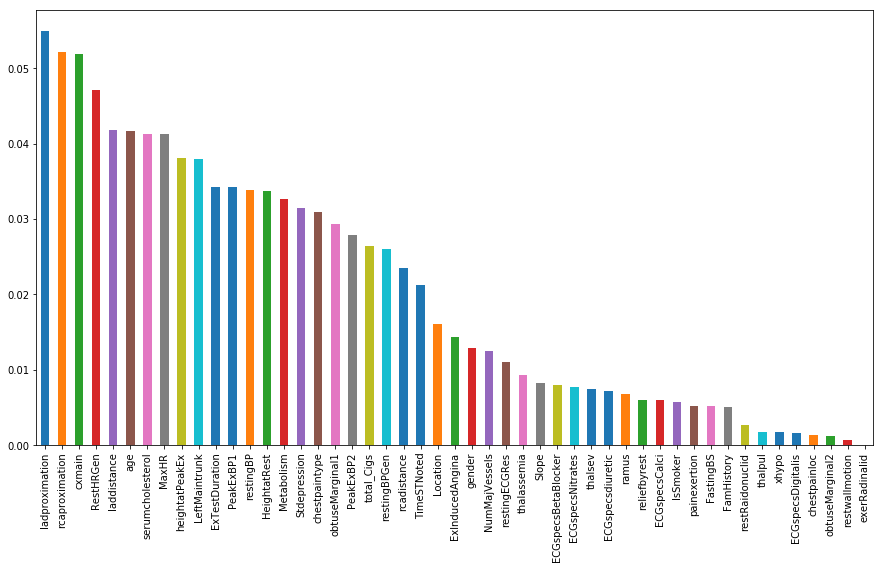

In [221]:
feat_importances_rf = pd.Series(rf.feature_importances_, index = x_train.columns)
feat_importances_ordered = feat_importances_rf.nlargest(n=len(feat_importances_rf))
feat_importances_ordered.plot(kind='bar',figsize=(15,8))

### Random Forest classifier with important features

In [392]:
unimp_cols=['chestpainloc','xhypo','ECGspecsDigitalis','thalpul','obtuseMarginal2','restwallmotion','exerRadinalid']
print(unimp_cols)

['chestpainloc', 'xhypo', 'ECGspecsDigitalis', 'thalpul', 'obtuseMarginal2', 'restwallmotion', 'exerRadinalid']


In [393]:
x_train_rf = x_train.drop(unimp_cols,axis=1)
x_valid_rf = x_valid.drop(unimp_cols,axis=1)

In [394]:
rf1 = RandomForestClassifier(n_estimators=100,random_state=1234)
rf1.fit(X=x_train_rf, y=y_train)
rf1_train_predictions = rf1.predict(x_train_rf)
rf1_valid_predictions = rf1.predict(x_valid_rf)

print("Accuracy for train: " ,accuracy_score(y_train, rf1_train_predictions))
print("Accuracy for validation: " ,accuracy_score(y_valid, rf1_valid_predictions))

Accuracy for train:  1.0
Accuracy for validation:  0.7185185185185186


### Decision Tree classifier with important features

In [395]:
dt1 = DecisionTreeClassifier(max_depth=7,random_state=0)
dt1 = dt1.fit(x_train_rf,y_train)

In [396]:
dt1_train_pred = dt1.predict(x_train_rf)
dt1_valid_pred = dt1.predict(x_valid_rf)

In [397]:
print("Accuracy of train: " ,accuracy_score(y_train, dt1_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, dt1_valid_pred))

Accuracy of train:  0.8794063079777366
Accuracy of valid:  0.8296296296296296


### Random Forest with grid search

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [116]:
rfc = RandomForestClassifier(n_jobs=-1,random_state=123) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [700,800,1000],
           "max_depth" : [7,9,10,11],
            "min_samples_leaf" : [2,4]
           }
scores = ['accuracy']

In [117]:
rf_clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=10)
rf_clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [700, 800, 1000], 'max_depth': [7, 9, 10, 11], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
rf_train_pred = rf_clf.predict(x_train)
rf_valid_pred = rf_clf.predict(x_valid)

print("Accuracy for train: " ,accuracy_score(y_train, rf_train_pred))
print("Accuracy for validation: " ,accuracy_score(y_valid, rf_valid_pred))


Accuracy for train:  0.9165120593692022
Accuracy for validation:  0.7111111111111111


In [119]:
print(rf_clf.best_score_,rf_clf.best_params_)

0.7272727272727273 {'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 1000}


### XGBoost

In [390]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(max_depth=7,objective="multi:softmax",n_estimators=700,num_class=5)
%time XGB_model.fit(x_train, y_train)
 
                         

Wall time: 8.52 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, num_class=5, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [391]:
xgb_train_pred = XGB_model.predict(x_train)
xgb_valid_pred = XGB_model.predict(x_valid)

print("Accuracy of train: " ,accuracy_score(y_train, xgb_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, xgb_valid_pred))


Accuracy of train:  1.0
Accuracy of valid:  0.6888888888888889


### Naive Bayes

In [392]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
NB = GaussianNB()

# Train the model using the training sets
NB.fit(x_train,y_train)

#Predict Output
NB_train_pred= NB.predict(x_train) 
NB_valid_pred= NB.predict(x_valid) 

print("Accuracy of train: " ,accuracy_score(y_train, NB_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, NB_valid_pred))


Accuracy of train:  0.4155844155844156
Accuracy of valid:  0.3851851851851852


### Standardization

In [251]:
std_cols = ['age', 'restingBP', 'serumcholesterol','total_Cigs', 'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression', 'HeightatRest', 'heightatPeakEx', 'restRaidonuclid']
print(std_cols)

['age', 'restingBP', 'serumcholesterol', 'total_Cigs', 'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression', 'HeightatRest', 'heightatPeakEx', 'restRaidonuclid']


In [255]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[std_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [256]:
x_train[std_cols]=scaler.transform(x_train[std_cols])
x_valid[std_cols]=scaler.transform(x_valid[std_cols])
#test[std_cols]=scaler.transform(test[std_cols])

### PCA

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)  
pca_x_train = pca.fit_transform(x_train)  
pca_x_valid = pca.transform(x_valid)  

In [56]:
explnd_var = pca.explained_variance_ratio_
explnd_var

array([0.65579059, 0.05312016, 0.04292612, 0.03104435, 0.02515867,
       0.0180953 , 0.0167226 , 0.01560175, 0.01417551, 0.01276444,
       0.01210216, 0.01102996, 0.00915845, 0.00839892, 0.00722729])

### Logistic regression with principal components

In [57]:
logmod_pca = LogisticRegression(random_state=123,multi_class="multinomial",solver='newton-cg')
logmod_pca.fit(pca_x_train, y_train)
logmod_pca_train_pred = logmod_pca.predict(pca_x_train)
logmod_pca_valid_pred = logmod_pca.predict(pca_x_valid)

print("Accuracy of train: " ,accuracy_score(y_train, logmod_pca_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, logmod_pca_valid_pred))

Accuracy of train:  0.49165120593692024
Accuracy of valid:  0.362962962962963


### Decision Tree Model with Principal Components

In [84]:
dt_pca = DecisionTreeClassifier(max_depth=7,random_state=0)
dt_pca = dt_pca.fit(pca_x_train,y_train)

In [85]:
dt_pca_train_pred = dt_pca.predict(pca_x_train)
dt_pca_valid_pred = dt_pca.predict(pca_x_valid)

In [86]:
print("Accuracy of train: " ,accuracy_score(y_train, dt_pca_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, dt_pca_valid_pred))

Accuracy of train:  0.7142857142857143
Accuracy of valid:  0.4444444444444444


### Adaboost Classifier

In [247]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=7),
    n_estimators = 600,
    learning_rate = 0.1)

In [248]:
%time Adaboost_model.fit(x_train, y_train)

Wall time: 3.09 s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=600, random_state=None)

In [249]:
Adaboost_train_pred = Adaboost_model.predict(x_train)
Adaboost_valid_pred = Adaboost_model.predict(x_valid)

In [250]:
print("Accuracy of train: " ,accuracy_score(y_train, Adaboost_train_pred))
print("Accuracy of valid: " ,accuracy_score(y_valid, Adaboost_valid_pred))

Accuracy of train:  1.0
Accuracy of valid:  0.6444444444444445
